## Purpose 
This notebook is intented to create and explore different ratio calulations. Functions used can be found in utils/ratio

In [1]:
# Set matplotlib for plotting in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

from fooof import FOOOF
from fooof import FOOOFGroup
import numpy as np
from utils.ratios import *

from fooof.utils import trim_spectrum
# Import some utilities for synthesizing some test data
from fooof.synth import gen_group_power_spectra, param_sampler, gen_power_spectrum

## Simulate Power Spectra

In [2]:
#Creats a single simulated power spectrum (Theta, slow peak alpha, beta)
def gen_sample():
    sample = []
    
    sample.append(np.random.uniform(4, 7)) #Theta freq
    sample.append(np.random.uniform(.35,.75)) #Theta Amp
    sample.append(np.random.uniform(.25,1.05))#Theta SD
    
    sample.append(np.random.uniform(8, 12)) # alpha freq
    sample.append(np.random.uniform(.25,.55)) #Alpha Amp
    sample.append(np.random.uniform(.25,1.05))#Alpha SD
    
    sample.append(np.random.uniform(18, 25)) #Beta freq
    sample.append(np.random.uniform(.4,.75)) #Beta Amp
    sample.append(np.random.uniform(.25,1.05))#Beta SD
    
    
    return sample

In [10]:
#Gen group of PSDs regular PSD

theta_band = [4,8]
beta_band = [15,30]
freqs, powers, _ = gen_group_power_spectra(100, [1,50], [0,1],gen_sample(), nlvs=np.random.uniform(.005,.02)) 

fg = FOOOFGroup(peak_width_limits=[1,8], min_peak_amplitude=0.05, max_n_peaks=3)

fg.add_data(freqs,powers)
fg.fit()

Lets take a look at some of the power spectra we have created

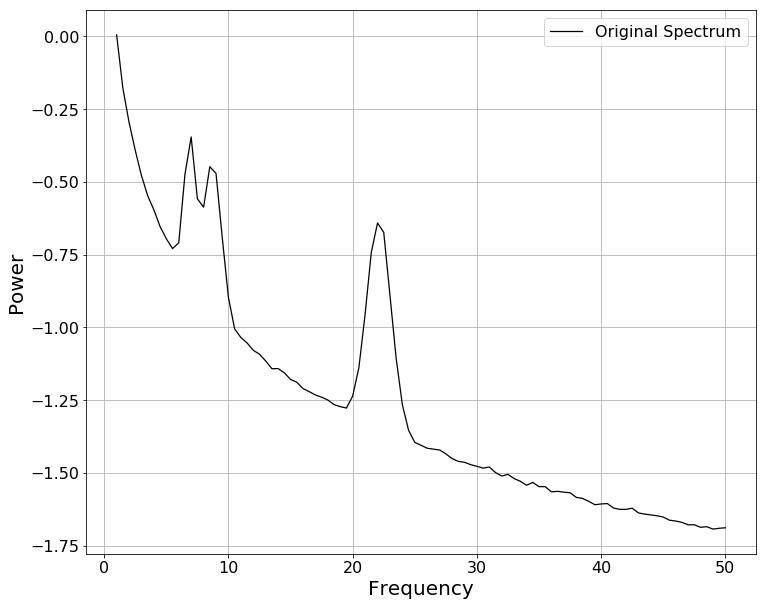

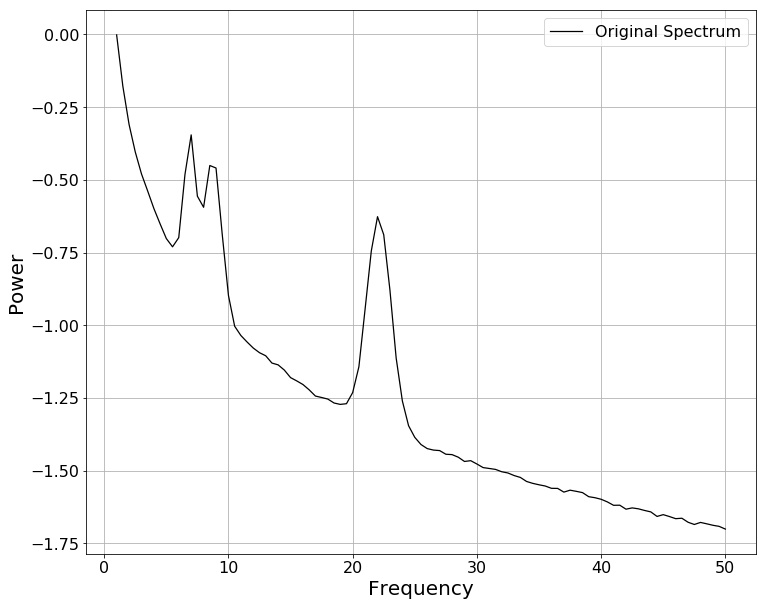

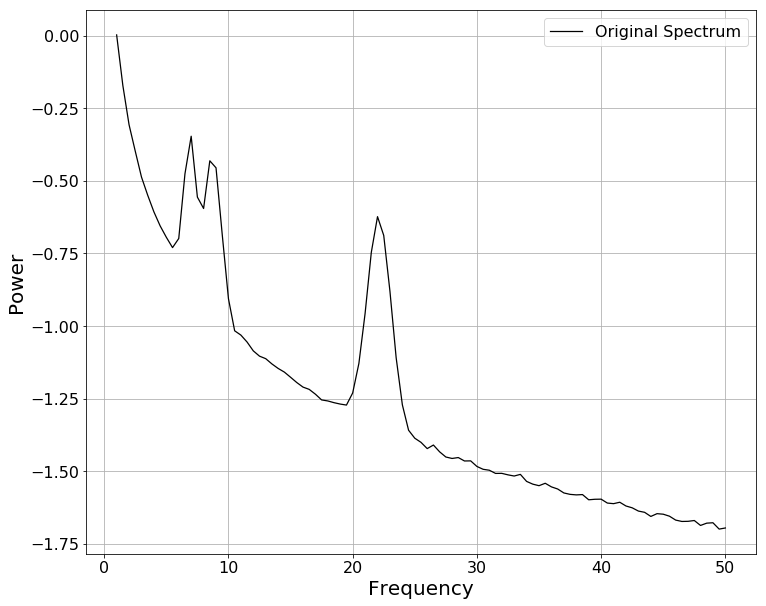

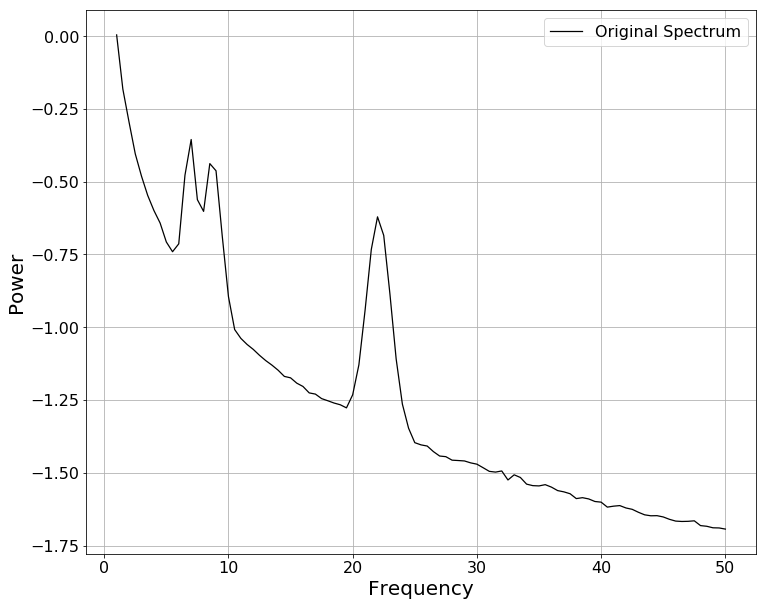

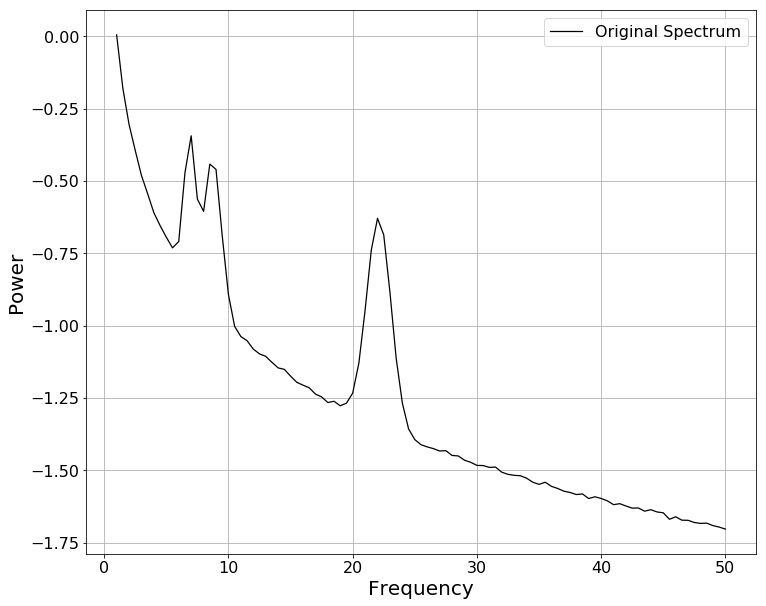

In [6]:
for i in range(5):
    fg.get_fooof(i+1).plot()
    
    

If all goes well, you should see 5 of our simulated PSD's. 

NOTE: The spikes here are greatly exaggerated for demonstration.

In [6]:
#Gather peak info for PSDs
peak = fg.get_all_data('peak_params')

# Calculate theta/beta ratios 

### Peak Power Ratio

In [7]:
calc_cf_power_ratio?

This ratio calculation method finds the ratio of the maximum power in each band. Low_band_power/ high_band_power

In [11]:
cf_ratios = calc_group_cf_power_ratio(fg,theta_band,beta_band)

In [9]:
# Check the ratio of power in [4,8] range vs [15,30]
cf_ratios

[0.683929251154658,
 0.6805578972003586,
 0.6830332125697361,
 0.6847796181849677,
 0.6671137899548936,
 0.6830598804327357,
 0.6847880193226452,
 0.6848292136624567,
 0.6698307349955591,
 0.6884141657944713,
 0.68065739922434,
 0.6845529597076238,
 0.6940792345608748,
 0.6919667735965106,
 0.6896068767599911,
 0.6842294172129126,
 0.6833473483787568,
 0.6746737736306234,
 0.678416822568358,
 0.6742122947154879,
 0.6857825505246321,
 0.6756278751235706,
 0.6823934424627768,
 0.6885261229139858,
 0.6742867047267167,
 0.6825037151363462,
 0.6895395801886467,
 0.6842894529396732,
 0.6835226985320756,
 0.6823250684820436,
 0.6726439377491636,
 0.6803186177555254,
 0.6685211394803932,
 0.6827912873594646,
 0.6921903950335998,
 0.6755275319073256,
 0.6730076793128245,
 0.6843014059180822,
 0.6818886141056427,
 0.6715206991051976,
 0.683053904955614,
 0.6760675482495329,
 0.6933906502272305,
 0.6794199620151682,
 0.6702704282059948,
 0.6893152098121924,
 0.6856725409665544,
 0.688256709118811

We can see here that our simulated data yielded theta over beta power ratios of about .68 

### Average Power Ratio

The idea here is that we we take average power in a frequency band and divide it by the average power in the other frequency band. Average power is calculated as the sum of all descrete power values divided by number on power values.

In [13]:
ap_ratios = calc_group_band_ratio(fg, theta_band, beta_band)

In [14]:
ap_ratios

[0.5009569770841827,
 0.4989061787394666,
 0.4953759187258418,
 0.5006315136140587,
 0.5014603857502046,
 0.5028563341735918,
 0.4994879694751727,
 0.4965740438540512,
 0.49661662614496316,
 0.49906954365819794,
 0.4990206747673584,
 0.49503777368940644,
 0.4947684347249413,
 0.5005935296090543,
 0.49617529461020965,
 0.49953007777345676,
 0.4897267826007323,
 0.49610027053954053,
 0.49904194867963786,
 0.49481451095218376,
 0.4961765447824413,
 0.494233202017692,
 0.499800070842545,
 0.4990058146239084,
 0.49802864014191867,
 0.4949891080512238,
 0.49046973918380005,
 0.5022753230827075,
 0.4981628884339951,
 0.494442550234148,
 0.49693347047120234,
 0.5011102313477769,
 0.4933311531053727,
 0.4912827516150855,
 0.4959151156466631,
 0.5025117797844114,
 0.5021199521405486,
 0.4996566072768487,
 0.5037598336341437,
 0.4982469558278403,
 0.49460375852415905,
 0.4937576817733119,
 0.49947039678635935,
 0.5016593428005162,
 0.49501515153646986,
 0.4938622171595104,
 0.4953951722034394,
 0

### Density Ratio

This method is similar to the average power ratio except average is calculated as the sum of all the power values divided by the bandwidth

In [15]:
d_ratios = calc_group_density_ratio(fg,theta_band,beta_band)

In [16]:
d_ratios

[0.14543912237927886,
 0.14484372931145809,
 0.14381881511395406,
 0.14534463298472672,
 0.14558527328231743,
 0.1459905486310428,
 0.14501263629924366,
 0.14416665789311164,
 0.14417902049369902,
 0.14489115783625098,
 0.14487697009374914,
 0.1437206439743438,
 0.14364244879111202,
 0.14533360537037063,
 0.14405089198360926,
 0.1450248612890681,
 0.14217874333569647,
 0.1440291108018021,
 0.1448831463908626,
 0.14365582576031138,
 0.14405125493683776,
 0.1434870586502977,
 0.1451032463736421,
 0.14487265585855402,
 0.14458896004120217,
 0.1437065152406779,
 0.14239444040819996,
 0.14582186799175378,
 0.14462793535180504,
 0.14354783716475267,
 0.14427100755615552,
 0.1454836155525804,
 0.14322517348220498,
 0.1426304762753474,
 0.14397535615548285,
 0.1458905167116033,
 0.14577676029886902,
 0.1450615956610206,
 0.1462528549260417,
 0.14465234201453428,
 0.14359463957153007,
 0.1433490043858002,
 0.1450075345508785,
 0.14564303500660145,
 0.14371407625252353,
 0.14337935336889013,
 0.